In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import seaborn as sns
    
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
 
from sklearn.linear_model import LinearRegression as lm
import statsmodels.api as sm

In [2]:
 # create a differenced series- get only random fluctuations
# this is like substracting the next value with previous
def difference(dataset, interval=1): # interval =1:default argument,remains 1 till change the value
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return (diff)

In [3]:
# Create large images!
register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize=(14, 8)) # was 16,12
plt.rc("font", size=13)

# HH Spot Price

In [4]:
import pip
#pip.main(["install", "openpyxl"])

In [5]:
import glob
import pandas as pd

# get data file names
path =r'D:\Ishangi_comeback\Aegis\Aegis_Advanced_Stats\Final_Assignment\Raw_data'
filenames = glob.glob(path + "/*.xlsx")

dfs = []

for df in dfs: 
    xl_file = pd.ExcelFile(filenames)

In [6]:
HH = pd.read_excel("HH Spot Price.xlsx") # data is taken every day
HH.head(20)

,Year,"Henry Hub Natural Gas Spot Price, Monthly (Dollars per Million Btu)"
0,1997 01,3.45
1,1997 02,2.15
2,1997 03,1.89
3,1997 04,2.03
4,1997 05,2.25
5,1997 06,2.20
6,1997 07,2.19
7,1997 08,2.49
8,1997 09,2.88
9,1997 10,3.07


In [7]:
HH.isnull().sum() # check for null values

Year                                                                   0
Henry Hub Natural Gas Spot Price, Monthly (Dollars per Million Btu)    0
dtype: int64

In [8]:
HH.shape

(291, 2)

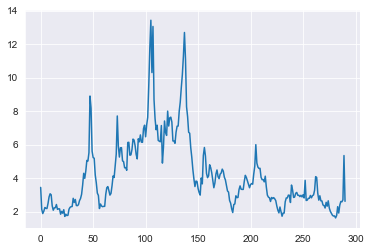

In [9]:
plt.plot(HH['Henry Hub Natural Gas Spot Price, Monthly (Dollars per Million Btu)'])

In [10]:
df_HH_1=HH['Henry Hub Natural Gas Spot Price, Monthly (Dollars per Million Btu)']
df_HH_1.shape

(291,)

In [11]:
df_HH_1

0      3.45
1      2.15
2      1.89
3      2.03
4      2.25
       ... 
286    2.61
287    2.59
288    2.71
289    5.35
290    2.62
Name: Henry Hub Natural Gas Spot Price, Monthly (Dollars per Million Btu), Length: 291, dtype: float64

In [12]:
# Converting to logrithmic values
df_HH=np.log(df_HH_1)

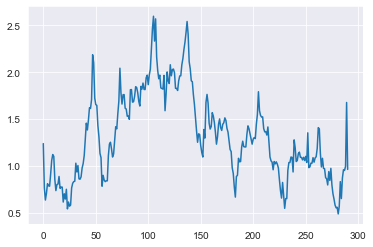

In [13]:
plt.plot(df_HH)

In [14]:
sm.tsa.stattools.adfuller(df_HH)

#IN ADF test, H0: Data is NOT STATIONARY
#             H1: Data is STATIONARY

#In result, 2nd value is p-value which is >0.05 hence, Null hypothesis can not be rejected(H0: Data is NOT STATIONARY).

(-1.983765386144094,
 0.29373646213830934,
 9,
 281,
 {'1%': -3.4538376962008495,
  '5%': -2.8718811911083093,
  '10%': -2.5722803076202174},
 -290.2171077821713)

In [15]:
# De-trend once
df_HH_diff1 = difference(df_HH,1)

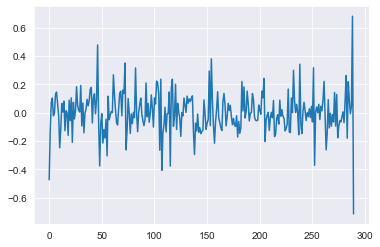

In [16]:
plt.plot(df_HH_diff1)
#no seasonality observed in the data

In [17]:
# Running thorugh ADF again to check if data is stationary, because now visually the mean betweeen 2 time windows seems to be stationary
# there is no seen seasonality in the data
# Run ADF tests on the de-trended data

sm.tsa.stattools.adfuller(df_HH_diff1)

# We observe that the p-value is < 0.05, thereby rejecting the NULL hypothesis of NON STATIONARITY
# Therefore the series is now STATIONARY

(-7.087795902243105,
 4.491169026567917e-10,
 8,
 281,
 {'1%': -3.4538376962008495,
  '5%': -2.8718811911083093,
  '10%': -2.5722803076202174},
 -285.3897807965908)

In [18]:
# Creating STL decomposition
from statsmodels.tsa.seasonal import STL

In [19]:
stl = STL(df_HH, period=12) # period 12 since its monthly data


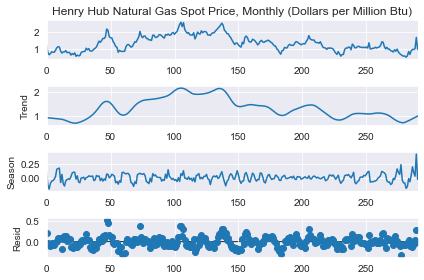

In [20]:
res = stl.fit()
fig = res.plot()

Split data into train and test (70-30)

In [21]:
#from sklearn.model_selection import train_test_split
# this will not work, because, it will take the data randomly and break the sequence

ratio = len(df_HH)*7//10 # taking 70-30 split for train and test
train_HH = df_HH.iloc[:ratio,]
test_HH=df_HH.iloc[ratio:,]



In [22]:
train_HH.shape

(203,)

In [23]:
train_HH

0      1.238374
1      0.765468
2      0.636577
3      0.708036
4      0.810930
         ...   
198    1.286474
199    1.232560
200    1.286474
201    1.302913
202    1.291984
Name: Henry Hub Natural Gas Spot Price, Monthly (Dollars per Million Btu), Length: 203, dtype: float64

In [24]:
test_HH

203    1.444563
204    1.549688
205    1.791759
206    1.589235
207    1.539015
         ...   
286    0.959350
287    0.951658
288    0.996949
289    1.677097
290    0.963174
Name: Henry Hub Natural Gas Spot Price, Monthly (Dollars per Million Btu), Length: 88, dtype: float64

In [25]:
test_HH.shape

(88,)

# M1- ARIMA

In [26]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


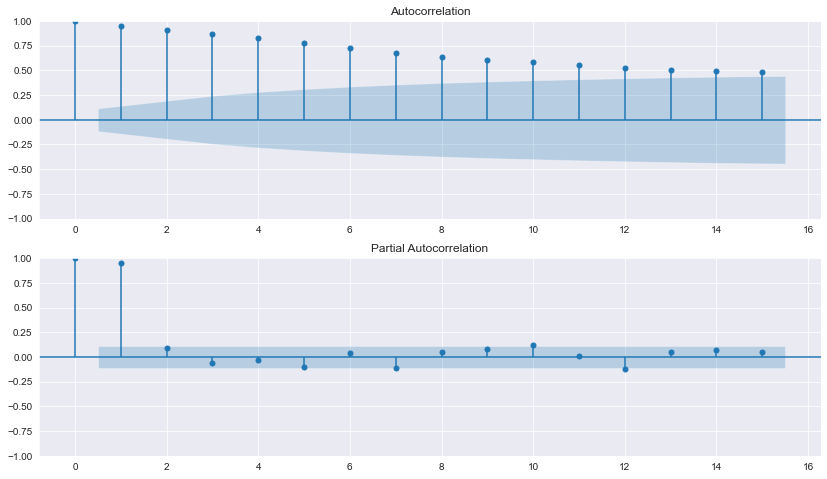

In [27]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_HH, lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_HH, lags=15, ax=ax2)

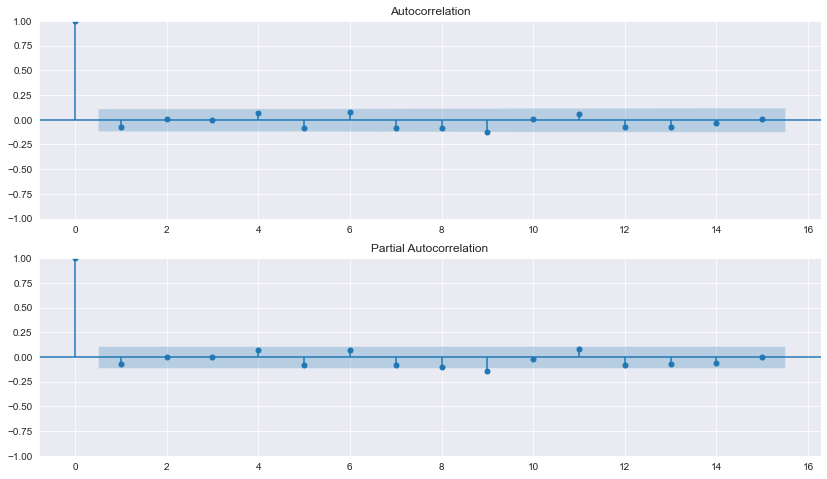

In [28]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_HH_diff1, lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_HH_diff1, lags=15, ax=ax2)

In [29]:
#Compute information criteria for many ARMA models.
#Each ic is an attribute with a DataFrame for the results. The AR order used is the row index. 
#The MA order used is the column index. The minimum orders are available as ic_min_order
sm.tsa.stattools.arma_order_select_ic(df_HH_diff1)

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'bic':             0           1           2
 0 -288.092152 -284.167826 -278.538264
 1 -284.198257 -278.537059 -272.865978
 2 -278.535839 -272.866159 -267.196213
 3 -272.865982 -267.199047 -261.529095
 4 -268.805363 -267.032356 -261.748618,
 'bic_min_order': (0, 0)}

In [30]:
# As per the ACF, PACF plot, p=0,q=0 , it could be random walk model.
# Also, as per above function, bic_min_order': (0, 0) which ,says p=0, q=0
# The AIC and BIC for p=0,q=0 is minimum as compared to other values and p-val is significant
# Conclusion: Naive model will give best results for forecast
M1 = sm.tsa.arima.ARIMA(train_HH,order=(0,1,0),seasonal_order=(0,0,0,0))
M1_res = M1.fit()
M1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                        SARIMAX Results                                                        
===============================================================================================================================
Dep. Variable:     Henry Hub Natural Gas Spot Price, Monthly (Dollars per Million Btu)   No. Observations:                  203
Model:                                                                  ARIMA(0, 1, 0)   Log Likelihood                 116.056
Date:                                                                 Mon, 29 Aug 2022   AIC                           -230.113
Time:                                                                         22:28:45   BIC                           -226.804
Sample:                                                                              0   HQIC                          -228.774
                                                                                 - 203                                         
Covariance Type:                                                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0186      0.001     13.095      0.000       0.016       0.021
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                16.63
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            -0.08
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

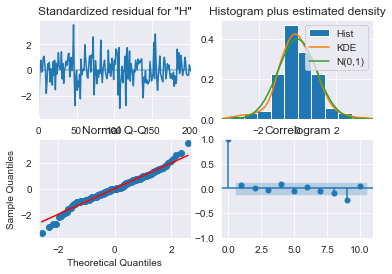

In [31]:
pred = M1_res.plot_diagnostics()

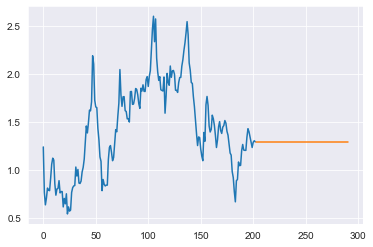

In [32]:
tforecast =  M1_res.forecast(88)# 88 is the test size, so forecasting for the same 
plt.plot(train_HH)
plt.plot(tforecast)

In [33]:
tforecast

203    1.291984
204    1.291984
205    1.291984
206    1.291984
207    1.291984
         ...   
286    1.291984
287    1.291984
288    1.291984
289    1.291984
290    1.291984
Name: predicted_mean, Length: 88, dtype: float64

In [34]:
tpredict =  M1_res.predict(1)
tpredict

1      1.238374
2      0.765468
3      0.636577
4      0.708036
5      0.810930
         ...   
198    1.342865
199    1.286474
200    1.232560
201    1.286474
202    1.302913
Name: predicted_mean, Length: 202, dtype: float64

In [35]:
train_HH

0      1.238374
1      0.765468
2      0.636577
3      0.708036
4      0.810930
         ...   
198    1.286474
199    1.232560
200    1.286474
201    1.302913
202    1.291984
Name: Henry Hub Natural Gas Spot Price, Monthly (Dollars per Million Btu), Length: 203, dtype: float64

In [36]:
#manually calculating the RMSE for train dataset
((train_HH[1:]-tpredict)**2).mean()

0.018556236852520187

In [37]:
import math
math.sqrt(0.018556236852520187)

0.1362212790004564

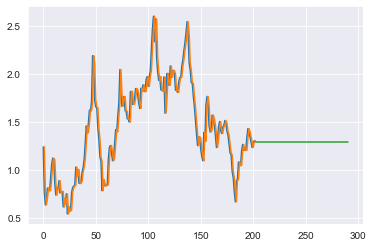

In [38]:
plt.plot(train_HH) # blue
plt.plot(tpredict)#orange
plt.plot(tforecast) #green

In [39]:
tforecast2 = M1_res.get_forecast(88)
confint = np.array(tforecast2.conf_int())

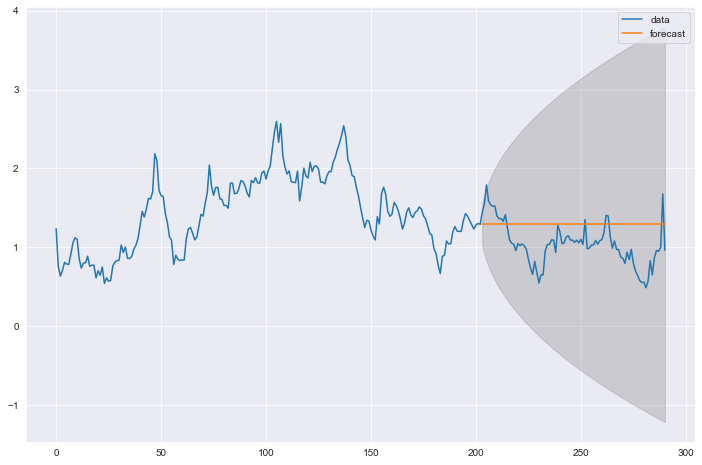

In [40]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df_HH.index, df_HH, label='data')
ax.plot(tforecast2.predicted_mean.index, tforecast2.predicted_mean, label='forecast')
ax.fill_between(tforecast2.predicted_mean.index, confint[:,0], confint[:,1],color='gray',alpha=0.3)
ax.legend()

In [41]:
#RMSE for test data for M1(ARIMA)
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test_HH,tforecast,squared=False)
RMSE

0.37153242531963304

In [42]:
# Calculating R-Squared to evaluate the model
#The ideal value for R-squared is 1 for best fit model
#Value of R-square can also be negative when the model fitted is worse than the average fitted model. 

from sklearn.metrics import r2_score

r2 = r2_score(test_HH, tforecast)
r2

-0.863769450672689

# M2- AutoARIMA

In [43]:
 #!pip install pmdarima

In [44]:
import pmdarima as pm

In [45]:
# The parameter is set to : seasonal=False 
M2 = pm.auto_arima(train_HH,start_p=0, start_q=0,
                             max_p=5, max_q=5, m=12,
                             start_P=0, seasonal=False,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-228.113, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-226.998, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-226.972, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-230.113, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-225.013, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.329 seconds


In [46]:
M2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  203
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 116.056
Date:                Mon, 29 Aug 2022   AIC                           -230.113
Time:                        22:28:47   BIC                           -226.804
Sample:                             0   HQIC                          -228.774
                                - 203                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0186      0.001     13.095      0.000       0.016       0.021
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                16.63
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            -0.08
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

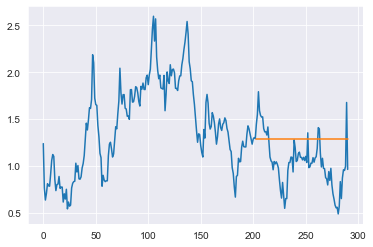

In [47]:
M2.fit(train_HH) #blue
fc = M2.predict(88) #orange
plt.plot(df_HH)
plt.plot(np.arange(203,203+88,1),fc)
# the Auto ARIMA has captured some seasonality as well, hence the predicted line is not a straight line

In [48]:
fc

203    1.291984
204    1.291984
205    1.291984
206    1.291984
207    1.291984
         ...   
286    1.291984
287    1.291984
288    1.291984
289    1.291984
290    1.291984
Length: 88, dtype: float64

In [49]:
#RMSE for test data for M2 (Auto-ARIMA)
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test_HH,fc,squared=False)
RMSE

0.37153242531963304

In [50]:
from sklearn.metrics import r2_score

r2 = r2_score(test_HH, fc)
r2
# the ARIMA model gives better accuracy as compared to Auto ARIMA model

-0.863769450672689

# M3- Holts Winter's Model

# Simple Exponential Smoothing: Level 

In [51]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [52]:
ses = SimpleExpSmoothing(train_HH)

In [53]:
type(ses)

statsmodels.tsa.holtwinters.model.SimpleExpSmoothing

In [54]:
result1 = ses.fit(smoothing_level=0.5, optimized=False)

In [55]:
result1.summary()

Dep. Variable:,"Henry Hub Natural Gas Spot Price, Monthly (Dollars per Million Btu)",No. Observations:,203
Model:,SimpleExpSmoothing,SSE,5.350
Optimized:,False,AIC,-734.114
Trend:,None,BIC,-727.488
Seasonal:,None,AICC,-733.912
Seasonal Periods:,None,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,22:28:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,1.2383742,l.0,False


In [56]:
pred1 = result1.predict(start=1, end=291)

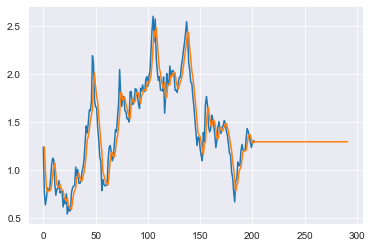

In [57]:
plt.plot(train_HH)
plt.plot(pred1)

In [58]:
result1.params

{'smoothing_level': 0.5,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 1.2383742310432684,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

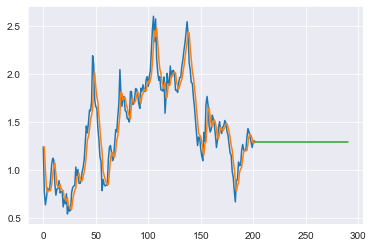

In [59]:
plt.plot(train_HH)
plt.plot(result1.fittedvalues)
plt.plot(result1.forecast(88))

In [60]:
result2 = ses.fit(smoothing_level=0.7, optimized=False) # optimize the values of alpha from 0.5 to 0.8

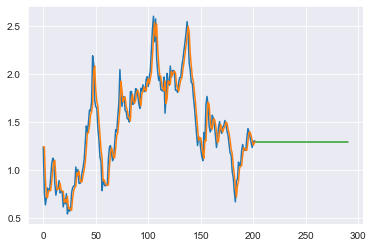

In [61]:
plt.plot(train_HH)
plt.plot(result2.fittedvalues)
plt.plot(result2.forecast(88))
# the model is better fitted when we increase the alpha from 0.5 to 0.8 i.e. the model is better explained by the recent observed value of alpha as compared to previous values

In [62]:
result2.params

{'smoothing_level': 0.7,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 1.2383742310432684,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# Holt's linear trend values: Level+Trend

In [63]:
from statsmodels.tsa.holtwinters import Holt

In [64]:
model = Holt(train_HH)
result3 = model.fit()
result3.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': 4.750199655136355e-18,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1.2381088637019397,
 'initial_trend': 0.00026537507101219866,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
result3.summary()

Dep. Variable:,"Henry Hub Natural Gas Spot Price, Monthly (Dollars per Million Btu)",No. Observations:,203
Model:,Holt,SSE,3.748
Optimized:,True,AIC,-802.354
Trend:,Additive,BIC,-789.101
Seasonal:,None,AICC,-801.925
Seasonal Periods:,None,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,22:28:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,4.7502e-18,beta,True


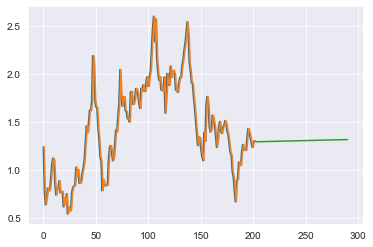

In [66]:
plt.plot(train_HH)
plt.plot(result3.fittedvalues)
plt.plot(result3.forecast(88))

# Final Holtz Winter Model: Level+Trend+Seasonality

In [67]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [68]:
#model = ExponentialSmoothing(train_HH, trend='add', seasonal='mul', seasonal_periods=12)
model = ExponentialSmoothing(train_HH, trend='add')
# there is no seasonal component
# Also, AIC BIC values are smaller for multiplicative model as compared to additive

In [69]:
result4 = model.fit()
result4.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1.2380632859261238,
 'initial_trend': 0.0002648492282023579,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [70]:
result4.summary()

Dep. Variable:,"Henry Hub Natural Gas Spot Price, Monthly (Dollars per Million Btu)",No. Observations:,203
Model:,ExponentialSmoothing,SSE,3.748
Optimized:,True,AIC,-802.354
Trend:,Additive,BIC,-789.101
Seasonal:,None,AICC,-801.925
Seasonal Periods:,None,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,22:28:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.000000,beta,True


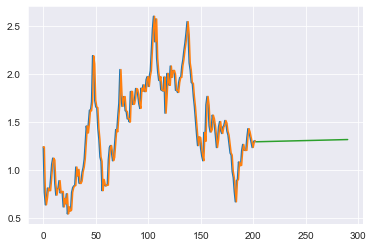

In [71]:
plt.plot(train_HH)
plt.plot(result4.fittedvalues)
plt.plot(result4.forecast(88))

In [72]:
result4.forecast(88)

203    1.292249
204    1.292513
205    1.292778
206    1.293043
207    1.293308
         ...   
286    1.314231
287    1.314496
288    1.314761
289    1.315026
290    1.315290
Length: 88, dtype: float64

In [73]:
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test_HH,result4.forecast(88),squared=False)
RMSE

0.38206989633895133

In [74]:
from sklearn.metrics import r2_score

r2 = r2_score(test_HH, result4.forecast(88))
r2

-0.9709898362395457

# Conclusion: Holt Winter's model and ARIMA both are showing similar R-squared value and accuracy.
ARIMA and Auto ARIMA give same results